# matersials.csv, techniques.csv の 分析

## 目的

train.csv の情報（年代別、target別、等々）と紐づけたmatersials.csv, techniques.csvの分析を行います。

## もくじ

### 0. 下準備
### 1. matersials.csv について
### 2. techniques.csv について

## 0. 下準備

In [13]:
# ライブラリインポート
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
from PIL import Image
import glob

In [14]:
# pandas データフレーム 読み込み
DATA_DIR = '/home/junya/Documents/dataset_atmaCup11'

train_df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
mate_df = pd.read_csv(os.path.join(DATA_DIR, 'materials.csv'))
tech_df = pd.read_csv(os.path.join(DATA_DIR, 'techniques.csv'))

In [15]:
print('train num: ', len(train_df), '\tmaterials num: ', len(mate_df), '\ttechniques num: ', len(tech_df))

train num:  3937 	materials num:  9081 	techniques num:  3777


[nndropout1 さん のディスカッション([EDA]コンペのデータへの理解を深めましょう！)](https://www.guruguru.science/competitions/17/discussions/c91c9c19-a907-4de9-89aa-294542758590/) で述べられています通り、

* materials.csv には train.csv の 1作品(60c1cacb453d497ad3a4.jpg) が存在しない。
* techniques.csv には train.csv の 1371作品 が存在しない。
* materials.csv、techniques.csv　それぞれには、ひとつの作品('object_id')に対して複数の材料、技法('name')が対応している。

という注意点がございます。

## 1. matersials.csv について

やりたい事は以下の通りです。
* ひとつの作品に使用される材料同士の相関関係を調べる。
    * 結局よくわかりませんでした。
* 年代ごとの材料の使用具合の推移を調べる。

まず、matersials.csv の 'name' 列の種類を調べてみます。

materials.csv の 'name' 列に対して one-hotエンコーディング + 'object_id' 内で足し合わせます。

In [16]:
one_hot_mate = pd.get_dummies(mate_df, columns=['name'])
one_hot_mate = one_hot_mate.set_index('object_id')
one_hot_mate = one_hot_mate.sum(level=0).reset_index()

# 余分な列名削除
new_name = {}
for name in one_hot_mate:
    new_name[name] = name.replace('name_', '')

one_hot_mate = one_hot_mate.rename(columns=new_name)

one_hot_mate.head()

,object_id,India ink (ink),bristol board,cardboard,chalk,deck paint,gold leaf,gouache (paint),graphite (mineral),ink,...,paper,parchment (animal material),pencil,prepared paper,tracing paper,varnish,velvet (fabric weave),watercolor (paint),wood (plant material),zinc
0,002bff09b09998d0be65,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,00309fb1ef05416f9c1f,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,003a1562e97f79ba96dc,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,004890880e8e7431147b,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,00718c32602425f504c1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [43]:
one_hot_mate

,object_id,India ink (ink),bristol board,cardboard,chalk,deck paint,gold leaf,gouache (paint),graphite (mineral),ink,...,paper,parchment (animal material),pencil,prepared paper,tracing paper,varnish,velvet (fabric weave),watercolor (paint),wood (plant material),zinc
0,002bff09b09998d0be65,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,00309fb1ef05416f9c1f,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,003a1562e97f79ba96dc,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,004890880e8e7431147b,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,00718c32602425f504c1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,ffa3259fff8e6f3818a1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
3932,ffd4d361756587883e48,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3933,ffd794b7b311b7b7fd92,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
3934,ffe49bba69d06446de7e,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


具体例としてひとつだけピックアップしてみます。

002bff09b09998d0be65
India ink (ink)                0
bristol board                  0
cardboard                      0
chalk                          0
deck paint                     0
gold leaf                      0
gouache (paint)                0
graphite (mineral)             0
ink                            1
leather                        0
linen (material)               0
metal                          0
oil paint (paint)              0
paint (coating)                0
palm leaf (material)           0
paper                          1
parchment (animal material)    0
pencil                         1
prepared paper                 0
tracing paper                  0
varnish                        0
velvet (fabric weave)          0
watercolor (paint)             0
wood (plant material)          0
zinc                           0
Name: 0, dtype: object


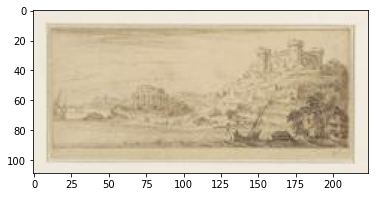

In [44]:
# ひとつだけ確認 (初心者向け講座でfor文からのbreakでひとつだけピックアップというテクを使用していたので早速使ってみちゃう
for index, row in one_hot_mate.iterrows():
    print(row.object_id)
    print(row.drop('object_id'))

    plt.imshow(Image.open(os.path.join(DATA_DIR, 'photos', f'{row.object_id}.jpg')))
    break

002bff09b09998d0be65.jpg には材料として ink, paper, pencil が使われているらしい！

ここで材料同士の相関をはかるために、混同行列で確認をしてみます。

<AxesSubplot:>

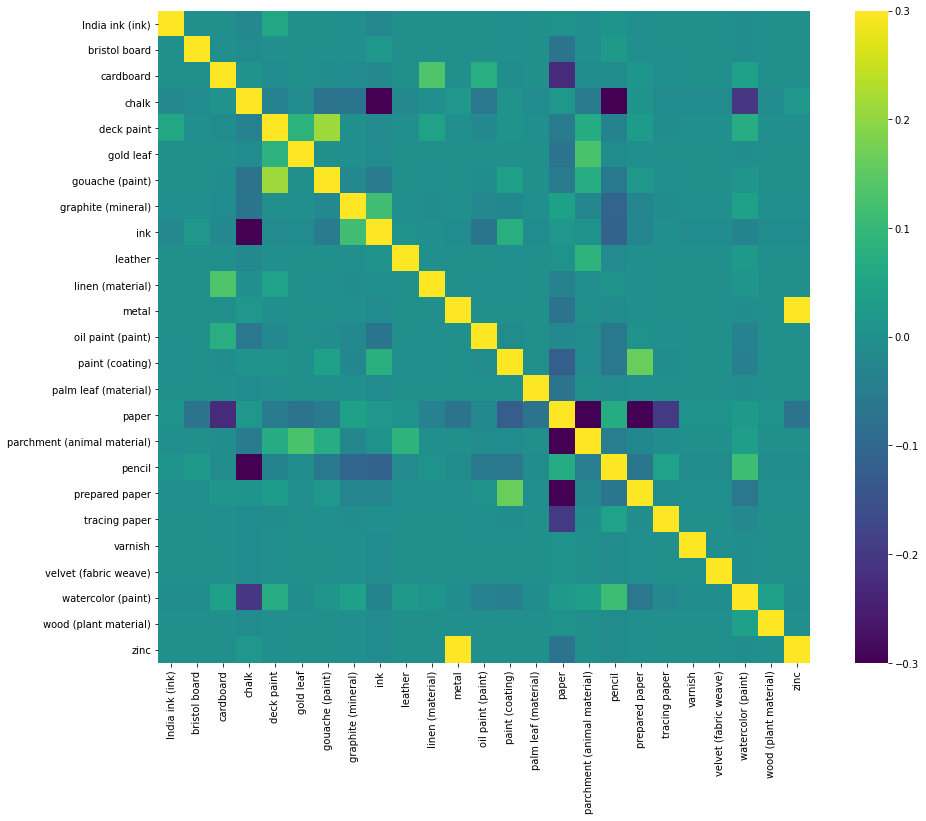

In [17]:
df_corr = one_hot_mate.corr()
fig, ax = plt.subplots(figsize=(16, 12)) 
sns.heatmap(df_corr, square=True, vmax=0.3, vmin=-0.3, center=0, cmap='viridis')

微細な相関を捉えるために、heatmapの描画する色と値の関係の限度を少し狭めています。(これをしてしまってよいのかわかりませんが...)

混同行列を眺めた感じですと、
* deck paint, gouache(paint) はよく一緒に使われる？
* tal, zinc は絶対一緒に使われると思ったら、サンプル数1つだけだった。
* chalkに対して、ink, pencil, watercolor(paint) が負の相関にあるということはどういうことだ...？

カテゴリ(0, 1) + マルチラベルの相関の計算になるため、この混同行列が何を意味しているのかよくわかりませんでしたが、材料ごとで相関がありそうなもの同士は大きな値が出ているということなのでしょうか。
この辺り、私自身の分析能力に欠けるので、ぜひご教授願います m(_ _)m

そうしましたら、train.csvとone-hotで表現されたmaterials.csvを紐づけて分析していきます。

In [18]:
unit_mate_df = train_df.merge(one_hot_mate, on='object_id', how='left')
unit_mate_df.head()

,object_id,sorting_date,art_series_id,target,India ink (ink),bristol board,cardboard,chalk,deck paint,gold leaf,...,paper,parchment (animal material),pencil,prepared paper,tracing paper,varnish,velvet (fabric weave),watercolor (paint),wood (plant material),zinc
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


materials.csv に存在しない train.csv の 1作品(60c1cacb453d497ad3a4.jpg) は以下のようにNaNになっています。

In [19]:
unit_mate_df[unit_mate_df.object_id == '60c1cacb453d497ad3a4']

,object_id,sorting_date,art_series_id,target,India ink (ink),bristol board,cardboard,chalk,deck paint,gold leaf,...,paper,parchment (animal material),pencil,prepared paper,tracing paper,varnish,velvet (fabric weave),watercolor (paint),wood (plant material),zinc
1468,60c1cacb453d497ad3a4,1700,7082ba275d243b0ab7d2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
"""class: 25 -> 5 + other class 1 -> 6"""
class_names = [class_name for class_name in mate_df.name.value_counts().index]
use_class_names = class_names[:5]
use_class_names.append('other')

not_use_class_names = class_names[5:]

one_hot_mate_copy = one_hot_mate

# other making
for name in not_use_class_names:
    one_hot_mate_copy.loc[one_hot_mate_copy[name] == 1, 'other'] = 1
    one_hot_mate_copy = one_hot_mate_copy.drop(name, axis=1)

one_hot_mate_copy = one_hot_mate_copy.fillna(0)

one_hot_mate_copy[one_hot_mate_copy.other==1]

,object_id,chalk,ink,paper,pencil,watercolor (paint),other
6,007f5e3620b458d77212,1,0,1,0,0,1.0
13,0108b38da16211245fcd,0,0,1,0,0,1.0
14,0110115b8b6036d9ab3c,0,1,1,0,1,1.0
18,014ea91de4356495caf4,1,0,0,0,0,1.0
29,02240a6096357c27079b,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...
3907,fe387ba42eb0f558bc6e,1,0,1,0,0,1.0
3917,fecae40c488e4c8c5ba5,1,0,1,0,0,1.0
3919,fed96a34121db8b0db7b,0,0,0,1,0,1.0
3924,ff1d216fb1f7aba9b8b4,0,1,0,0,0,1.0


'target'(年代)ごとでグループ分けした各材料の使用具合の推移を見てみます。

見やすくするために、絶対数が少ない(num < 10)
 * tracing paper
 * linen (material)
 * India ink (ink)
 * leather
 * wood (plant material)
 * velvet (fabric weave)
 * palm leaf (material)
 * metal, zinc, varnish
 * gold leaf
 * bristol board
 
 は削除しちゃいます。

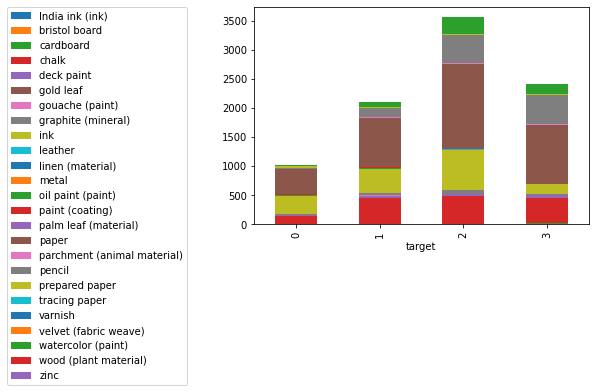

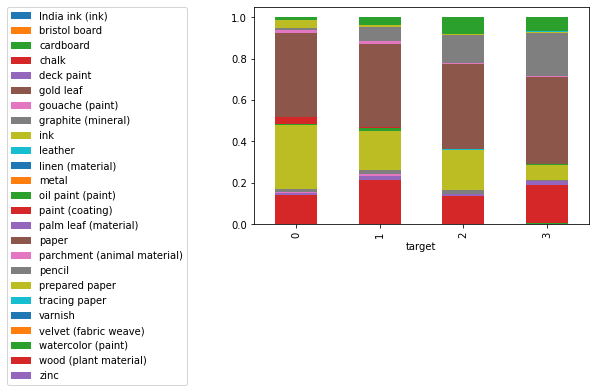

In [21]:
# 全部みるときはこちら
grouped_unit_df = unit_mate_df.drop('object_id', axis=1).drop('sorting_date', axis=1).drop('art_series_id', axis=1).groupby('target').sum()

#drop_list = ['tracing paper', 'linen (material)', 'India ink (ink)', 'leather', 'wood (plant material)', 'velvet (fabric weave)', 'palm leaf (material)', 'metal', 'zinc', 'varnish', 'gold leaf', 'bristol board']
#grouped_unit_df = unit_mate_df.drop('object_id', axis=1).drop('sorting_date', axis=1).drop('art_series_id', axis=1)

# 削除
#for drop in drop_list:
#    grouped_unit_df = grouped_unit_df.drop(drop, axis=1)

grouped_unit_df = grouped_unit_df.groupby('target').sum()

grouped_unit_df.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(-0.2, 1), loc='upper right', borderaxespad=0, fontsize=10)

grouped_unit_df.div(grouped_unit_df.sum(axis=1), axis=0).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(-0.2, 1), loc='upper right', borderaxespad=0, fontsize=10)

上図は、'target'(年代別)でのサンプル数の推移、下図は、'target'(年代別)での使用割合の推移を表します。凡例が棒グラフのスタックする順番と逆に表示されていますので注意してください。

下図を眺めた感じですと、
* paper は一概によく使用されている。
* pencil, watercolor (paint) は年代を経るごとに使用具合が増えていく。
* ink は年代を経るごとに使用具合が減っていく。

このへんの材料が特徴量としてキーになってくるんですかね！(wkwk) また、'target' ですと「世紀ごと」という大きなくくりで分割されてしまっていますので、50年ごとで分割して使用具合の遷移を見るのも面白いかもしれませんね。

## 2. techniques.csv について

やりたい事は、materials.csvのときと同様に以下の通りです。
* ひとつの作品に使用される材料同士の相関関係を調べる。
    * 結局これもよくわかってません。
* 年代ごとの材料の使用具合の推移を調べる。

まず、techniques.csv の 'name' 列の種類を調べてみます。

In [22]:
print('種類: ', tech_df.name.unique())
print('数: ', len(tech_df.name.unique()), '種類')

print('\n',tech_df.name.value_counts())

種類:  ['pen' 'brush' 'counterproof' 'pencil' 'snipping' 'chalk' 'engraving'
 'sewing' 'letterpress printing' 'scoring']
数:  10 種類

 brush                   2179
pen                     1569
counterproof              17
chalk                      3
snipping                   2
pencil                     2
engraving                  2
scoring                    1
letterpress printing       1
sewing                     1
Name: name, dtype: int64


techniques.csv の 'name' 列に対して one-hotエンコーディング + 'object_id' 内で足し合わせます。

In [23]:
one_hot_tech = pd.get_dummies(tech_df, columns=['name'])
one_hot_tech = one_hot_tech.set_index('object_id')
one_hot_tech = one_hot_tech.sum(level=0).reset_index()

# 余分な列名削除
new_name = {}
for name in one_hot_tech:
    new_name[name] = name.replace('name_', '')

one_hot_tech = one_hot_tech.rename(columns=new_name)
one_hot_tech.head()

,object_id,brush,chalk,counterproof,engraving,letterpress printing,pen,pencil,scoring,sewing,snipping
0,002bff09b09998d0be65,0,0,0,0,0,1,0,0,0,0
1,00309fb1ef05416f9c1f,1,0,0,0,0,0,0,0,0,0
2,004890880e8e7431147b,0,0,1,0,0,0,0,0,0,0
3,007f5e3620b458d77212,1,0,0,0,0,0,0,0,0,0
4,00bf812ffe8a62d45661,1,0,0,0,0,1,0,0,0,0


techniques.csv の 'name' 列に対して one-hotエンコーディング + 'object_id' 内で足し合わせます。

002bff09b09998d0be65
brush                   0
chalk                   0
counterproof            0
engraving               0
letterpress printing    0
pen                     1
pencil                  0
scoring                 0
sewing                  0
snipping                0
Name: 0, dtype: object


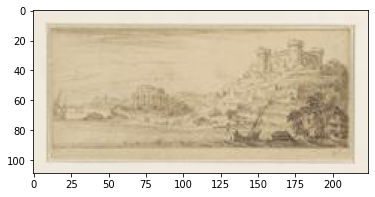

In [24]:
# ひとつだけ確認
for index, row in one_hot_tech.iterrows():
    print(row.object_id)
    print(row.drop('object_id'))

    plt.imshow(Image.open(os.path.join(DATA_DIR, 'photos', f'{row.object_id}.jpg')))
    break

002bff09b09998d0be65.jpg には技法として pen が使われているらしい！

ここで技法同士の相関をはかるために、混同行列で確認をしてみます。

<AxesSubplot:>

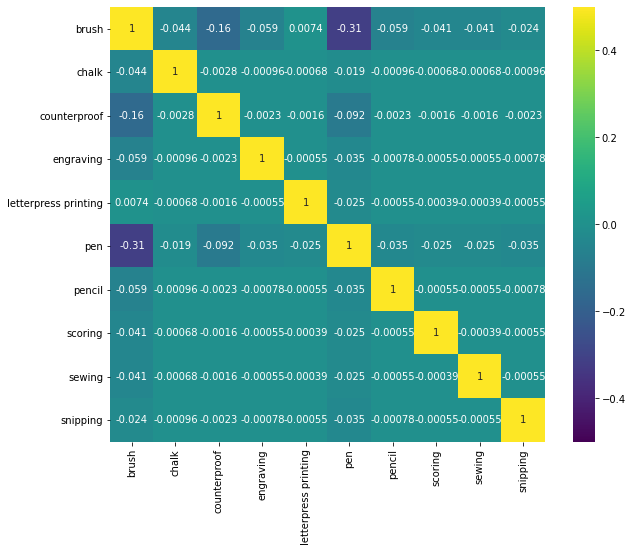

In [25]:
df_corr = one_hot_tech.corr()
fig, ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(df_corr, square=True, vmax=0.5, vmin=-0.5, center=0, cmap='viridis', annot=True)

混同行列を眺めた感じですと、
* brush, penが負の相関にある...？

brush, pen のときだけ抽出して調べてみます。

In [26]:
print('brush, pen が内在している割合: ', len(one_hot_tech[(one_hot_tech.brush == 1) & (one_hot_tech.pen == 1)]) / len(one_hot_tech))

brush, pen が内在している割合:  0.45167575993764614


techniques.csvのなかでも、45%もの作品で brush, pen の両方を技法として使用しているらしいです。 (線画はpen、色塗りはbrushみたいな感じなんですかね)

そうしましたら、train.csvとone-hotで表現されたtechniques.csvを紐づけて分析していきます。

In [27]:
unit_tech_df = train_df.merge(one_hot_tech, on='object_id', how='left')
unit_tech_df

,object_id,sorting_date,art_series_id,target,brush,chalk,counterproof,engraving,letterpress printing,pen,pencil,scoring,sewing,snipping
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,ffa3259fff8e6f3818a1,1850,b187c294b0550acf049a,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3933,ffd4d361756587883e48,1670,ad49a044770a48f860a6,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3934,ffd794b7b311b7b7fd92,1789,f030a01b480b18a27be2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3935,ffe49bba69d06446de7e,1805,f5287bc84a05aada1d17,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


techniques.csv に存在しない train.csv の 1371作品 は以下のようにNaNになっています。

In [28]:
unit_tech_df[unit_tech_df.pen.isnull()]

,object_id,sorting_date,art_series_id,target,brush,chalk,counterproof,engraving,letterpress printing,pen,pencil,scoring,sewing,snipping
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,007c091616828798b5e1,1839,e9440b5eb4b77f1ce0e3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,00990614b43285e49f4a,1893,8134b18cdc27af23e1a8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,00c93e990e799fb3d8c9,1775,2d29062fe2b09738757b,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,fedec46674f75eeebf29,1683,d29a4318878aa4053d9b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3923,fefd3c7d2aaf156aa743,1857,0e70675fddb921189c3a,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3927,ff32f8ea29ea2ec557e6,1831,374dc017e81ba976758e,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3928,ff37540e22e1ef455368,1765,9971eebf0f583a5e51da,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'target'(年代)ごとでグループ分けした各技法の使用具合の推移を見てみます。

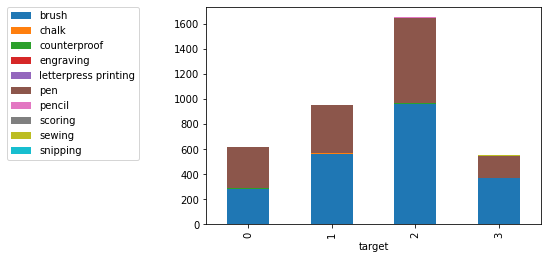

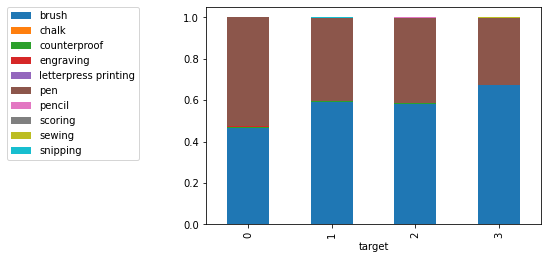

In [29]:
grouped_unit_df = unit_tech_df.drop('object_id', axis=1).drop('sorting_date', axis=1).drop('art_series_id', axis=1).groupby('target').sum()

grouped_unit_df.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(-0.2, 1), loc='upper right', borderaxespad=0, fontsize=10)

grouped_unit_df.div(grouped_unit_df.sum(axis=1), axis=0).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(-0.2, 1), loc='upper right', borderaxespad=0, fontsize=10)

こちらも同様に上図は、'target'(年代別)でのサンプル数の推移、下図は、'target'(年代別)での使用割合の推移を表します。凡例が棒グラフのスタックする順番と逆に表示されていますので注意してください。

下図を眺めた感じですと、

* ほとんどの技法が brush, pen。
* brush は年代を経るごとに使用割合が増えていく。
* pen は年代を経るごとに使用割合が減っていく。

技法に関してはほぼbrush, penなんですね～。

In [33]:
def target_encoder(self, target, num=2):
    """class: 10 -> 2 + other class 1 -> 3"""
    class_names = [class_name for class_name in self.tech_df.name.value_counts().index]
    use_class_names = class_names[:num]
    use_class_names.append('other')

    not_use_class_names = class_names[num:]

    # other making
    for name in not_use_class_names:
        target.loc[target[name] == 1, 'other'] = 1
        target = target.drop(name, axis=1)

    target = target.fillna(0)

    return target

In [32]:
# train, materials, techniques を紐付ける
unit_mate_df = target_encoder(unit_mate_df)
unit_tech_df = target_encoder(unit_tech_df)

unit_tech_df.loc[unit_tech_df.pen.isnull(), 'other'] = 1
unit_tech_df.fillna(0)

unit_mate_df.loc[unit_mate_df.paper.isnull(), 'other'] = 1
unit_mate_df.fillna(0)

print(unit_mate_df)
print(unit_tech_df)

                 object_id  sorting_date         art_series_id  target  \
0     002bff09b09998d0be65          1631  509357f67692a6a45626       1   
1     00309fb1ef05416f9c1f          1900  7987b47bbe5dc3039179       3   
2     003a1562e97f79ba96dc          1834  ded7c3c9636708e5b14c       3   
3     004890880e8e7431147b          1743  582ac2d7f0cef195b605       2   
4     00718c32602425f504c1          1885  64c907f0c08dce4fb8e8       3   
...                    ...           ...                   ...     ...   
3932  ffa3259fff8e6f3818a1          1850  b187c294b0550acf049a       3   
3933  ffd4d361756587883e48          1670  ad49a044770a48f860a6       1   
3934  ffd794b7b311b7b7fd92          1789  f030a01b480b18a27be2       2   
3935  ffe49bba69d06446de7e          1805  f5287bc84a05aada1d17       3   
3936  ffe77db10be3400bed53          1700  60dec6e091cdd973e617       1   

      India ink (ink)  bristol board  cardboard  chalk  deck paint  gold leaf  \
0                 0.0         